<a href="https://colab.research.google.com/github/AdithyaDVarma/Salary-Prediction_Semester1/blob/main/Salary_Prediction_AIE_B_Project_Sem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [735]:
# importing the necessary modules and packages
import os
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn import linear_model 
import statsmodels.formula.api as smf

**DATA HANDLING**

In [736]:
#Creating the YearsExperience vs Salary data using training set csv
import csv
import random
f=open("Trainingset.csv","w")
w=csv.writer(f)
w.writerow(["Age","YearsExperience","Years of Education","QYearsExperience","CYearsExperience","CombinedParameter","Salary"])

for i in range(500):
  age=random.uniform(24,65)
  if age>=24 and age<=30:
      exp=random.uniform(1,4.3)
      educ=random.randint(3,6)
      sal=random.uniform(40000.7,60000.54)
  elif age>=31 and age<=40:
      exp=random.uniform(4.6,7.8)
      educ=random.randint(3,7)
      sal=random.uniform(50000.7,80000.54)
  elif age>=41 and age<=50:
      exp=random.uniform(7,12)
      educ=random.randint(5,9)
      sal=random.uniform(60000.7,90000.54)
  elif age>=51:
      exp=random.uniform(12,20)
      educ=random.randint(3,9)
      sal=random.uniform(50000.7,100000.54)
      w.writerow([age,exp,educ,exp**2,exp**3,(age+exp)*educ,sal])
f.close()

f=open("Testset.csv","w")
w=csv.writer(f)
w.writerow(["Age","YearsExperience","Years of Education","QYearsExperience","CYearsExperience","CombinedParameter","Salary"])

for i in range(500):
  age=random.uniform(24,65)
  if age>=24 and age<=30:
      exp=random.uniform(1,4.3)
      educ=random.randint(3,6)
      sal=random.uniform(40000.7,60000.54)
  elif age>=31 and age<=40:
      exp=random.uniform(4.6,7.8)
      educ=random.randint(3,7)
      sal=random.uniform(50000.7,80000.54)
  elif age>=41 and age<=50:
      exp=random.uniform(7,12)
      educ=random.randint(5,9)
      sal=random.uniform(60000.7,90000.54)
  elif age>=51:
      exp=random.uniform(12,20)
      educ=random.randint(3,9)
      sal=random.uniform(50000.7,100000.54)
      w.writerow([age,exp,educ,exp**2,exp**3,(age+exp)*educ,sal])
f.close()




In [737]:
# Initializing the trainingset and testset data objects using pandas
Testset = pd.read_csv("Testset.csv")
Training = pd.read_csv("Trainingset.csv") 

#The head() function is used to get the first few rows of the Testset
Testset.head()

,Age,YearsExperience,Years of Education,QYearsExperience,CYearsExperience,CombinedParameter,Salary
0,54.796262,14.552752,9,211.782583,3082.019357,624.141124,91019.026218
1,52.774087,14.169074,7,200.762647,2844.620717,468.602126,65338.199471
2,52.497483,14.486505,5,209.858838,3040.121191,334.919942,84974.970717
3,55.012830,15.776872,6,248.909683,3927.016155,424.738210,79080.958366
4,59.144511,16.275620,6,264.895815,4311.343690,452.520789,62774.559215


In [738]:
# Using the data object  to find some general values like mean, minimum etc
Testset.describe()

,Age,YearsExperience,Years of Education,QYearsExperience,CYearsExperience,CombinedParameter,Salary
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,57.293947,16.079276,6.027322,263.317628,4388.390295,441.503718,76525.906832
std,4.052202,2.191061,1.987410,71.025472,1754.417970,146.435687,14434.452248
min,51.022176,12.230163,3.000000,149.576886,1829.349692,196.997822,50008.258550
25%,53.782454,14.479398,4.000000,209.653007,3035.650717,322.867183,65683.948293
50%,57.063546,15.882258,6.000000,252.246115,4006.237842,453.598869,76637.561433
75%,61.155038,17.852257,8.000000,318.703741,5689.604972,565.218260,89415.287403
max,64.892420,19.969557,9.000000,398.783188,7963.523430,737.361444,99697.501785


In [739]:
# corr() is used to find the pairwise correlation of all columns in the data we provided.
# The closer its value is to 1, the more variability the model explains.
Testset.corr()

,Age,YearsExperience,Years of Education,QYearsExperience,CYearsExperience,CombinedParameter,Salary
Age,1.000000,-0.084464,-0.122462,-0.085166,-0.085782,0.035688,-0.064039
YearsExperience,-0.084464,1.000000,0.055530,0.997821,0.991644,0.132295,0.048526
Years of Education,-0.122462,0.055530,1.000000,0.055903,0.056311,0.981568,-0.068327
QYearsExperience,-0.085166,0.997821,0.055903,1.000000,0.997987,0.132512,0.050253
CYearsExperience,-0.085782,0.991644,0.056311,0.997987,1.000000,0.132399,0.052132
CombinedParameter,0.035688,0.132295,0.981568,0.132512,0.132399,1.000000,-0.073134
Salary,-0.064039,0.048526,-0.068327,0.050253,0.052132,-0.073134,1.000000


YEARS OF EXPERIENCE VS SALARY

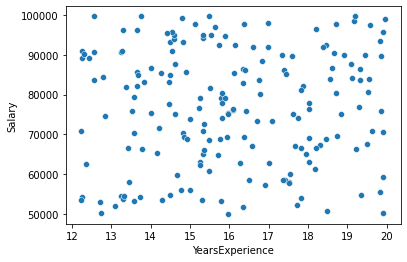

In [740]:
# We are using seaborn, which is used to display mathematical scatter plot of the given data
sns.scatterplot(data=Testset, x="YearsExperience",y="Salary")

In [741]:
# Conducting Linear Regression method and inserting data using the fit method
# Fit function adjusts weights according to data values so that better accuracy can be achieved
#Dataset = pd.read_csv("T.csv")
lm = linear_model.LinearRegression(). fit(Training[["YearsExperience"]],Training[["Salary"]])
# Using the predict method

result=lm.predict(Testset[["YearsExperience"]])

In [742]:
# Creating a new column to place contents of the result variable
Testset["Predicted Salary Using Sklearn method"]= result
Testset.head()

,Age,YearsExperience,Years of Education,QYearsExperience,CYearsExperience,CombinedParameter,Salary,Predicted Salary Using Sklearn method
0,54.796262,14.552752,9,211.782583,3082.019357,624.141124,91019.026218,74717.486948
1,52.774087,14.169074,7,200.762647,2844.620717,468.602126,65338.199471,74656.773019
2,52.497483,14.486505,5,209.858838,3040.121191,334.919942,84974.970717,74707.004004
3,55.012830,15.776872,6,248.909683,3927.016155,424.738210,79080.958366,74911.193936
4,59.144511,16.275620,6,264.895815,4311.343690,452.520789,62774.559215,74990.116805


In [743]:
# Created a new column to show the error current salary minus predicted salary
Testset["Prediction Error Using Sklearn method"] = Testset["Salary"]-Testset["Predicted Salary Using Sklearn method"]
Testset.head()

,Age,YearsExperience,Years of Education,QYearsExperience,CYearsExperience,CombinedParameter,Salary,Predicted Salary Using Sklearn method,Prediction Error Using Sklearn method
0,54.796262,14.552752,9,211.782583,3082.019357,624.141124,91019.026218,74717.486948,16301.539270
1,52.774087,14.169074,7,200.762647,2844.620717,468.602126,65338.199471,74656.773019,-9318.573548
2,52.497483,14.486505,5,209.858838,3040.121191,334.919942,84974.970717,74707.004004,10267.966713
3,55.012830,15.776872,6,248.909683,3927.016155,424.738210,79080.958366,74911.193936,4169.764429
4,59.144511,16.275620,6,264.895815,4311.343690,452.520789,62774.559215,74990.116805,-12215.557590


Text(0.5, 1.0, 'Linear Regression: Years of Experience vS Corresponding Salary ')

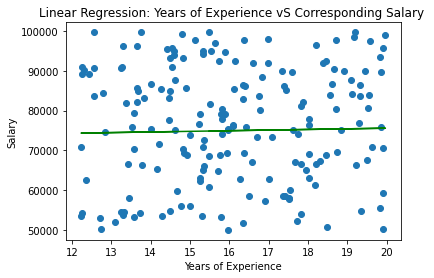

In [744]:
# Plotting Linear Regression graph with Sklearn  
plt.scatter(Testset["YearsExperience"], Testset["Salary"])
plt.plot(Testset["YearsExperience"],Testset["Predicted Salary Using Sklearn method"], color="green")
plt.ylabel("Salary")
plt.xlabel("Years of Experience")
plt.title("Linear Regression: Years of Experience vS Corresponding Salary ")

In [745]:
m=lm.coef_

In [746]:
b=lm.intercept_

In [747]:
#Testing for 7 years of experience
Salary = b + m *11.3
Salary

array([[74202.76557947]])

In [748]:
lm.predict([[11.3]]) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[74202.76557947]])

In [749]:
assert Salary == lm.predict([[11.3]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


AGE VS SALARY CONDITION

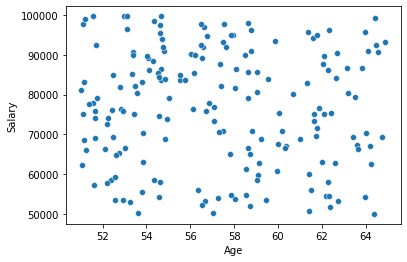

In [750]:
sns.scatterplot(data=Testset, x="Age",y="Salary")

In [751]:
# Conducting Linear Regression method and inserting data using the fit method
# Fit function adjusts weights according to data values so that better accuracy can be achieved

lm = linear_model.LinearRegression(). fit(Training[["Age"]],Training[["Salary"]])
# Using the predict method
result=lm.predict (Testset[["Age"]])

In [752]:
# Creating a new column to place contents of the result variable
Testset["Predicted Salary Using Sklearn method"] = result
Testset["Prediction Error Using Sklearn method"] = Testset["Salary"]-Testset["Predicted Salary Using Sklearn method"]
Testset.head()

,Age,YearsExperience,Years of Education,QYearsExperience,CYearsExperience,CombinedParameter,Salary,Predicted Salary Using Sklearn method,Prediction Error Using Sklearn method
0,54.796262,14.552752,9,211.782583,3082.019357,624.141124,91019.026218,74611.507376,16407.518842
1,52.774087,14.169074,7,200.762647,2844.620717,468.602126,65338.199471,74351.474510,-9013.275039
2,52.497483,14.486505,5,209.858838,3040.121191,334.919942,84974.970717,74315.905770,10659.064947
3,55.012830,15.776872,6,248.909683,3927.016155,424.738210,79080.958366,74639.355987,4441.602379
4,59.144511,16.275620,6,264.895815,4311.343690,452.520789,62774.559215,75170.651782,-12396.092566


Text(0.5, 1.0, 'Linear Regression: Age vS Corresponding Salary ')

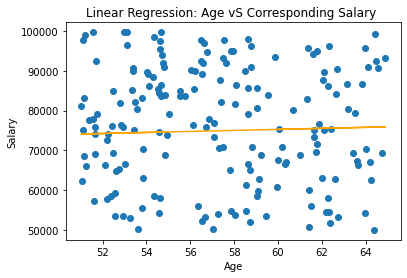

In [753]:
plt.scatter(Testset["Age"], Testset["Salary"])
plt.plot(Testset["Age"],Testset["Predicted Salary Using Sklearn method"], color="orange")
plt.ylabel("Salary")
plt.xlabel("Age")
plt.title("Linear Regression: Age vS Corresponding Salary ")

In [754]:
m=lm.coef_

In [755]:
b=lm.intercept_

In [756]:
#Testing for 7 years of experience
Salary = b + m * 7
Salary

array([[68465.35272122]])

In [757]:
lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[68465.35272122]])

In [758]:
assert Salary == lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


YEARS OF EDUCATION VS SALARY

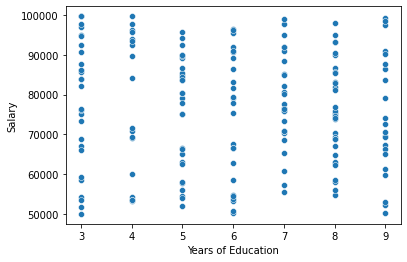

In [759]:
sns.scatterplot(data=Testset, x="Years of Education",y="Salary")

In [760]:
# Conducting Linear Regression method and inserting data using the fit method
# Fit function adjusts weights according to data values so that better accuracy can be achieved

lm = linear_model.LinearRegression(). fit(Training[["Years of Education"]],Training[["Salary"]])
# Using the predict method
result=lm.predict (Testset[["Years of Education"]])

In [761]:
# Creating a new column to place contents of the result variable
Testset["Predicted Salary Using Sklearn method"]= result
Testset["Prediction Error Using Sklearn method"] = Testset["Salary"]-Testset["Predicted Salary Using Sklearn method"]
Testset.head()

,Age,YearsExperience,Years of Education,QYearsExperience,CYearsExperience,CombinedParameter,Salary,Predicted Salary Using Sklearn method,Prediction Error Using Sklearn method
0,54.796262,14.552752,9,211.782583,3082.019357,624.141124,91019.026218,72732.184092,18286.842126
1,52.774087,14.169074,7,200.762647,2844.620717,468.602126,65338.199471,74286.355413,-8948.155941
2,52.497483,14.486505,5,209.858838,3040.121191,334.919942,84974.970717,75840.526734,9134.443984
3,55.012830,15.776872,6,248.909683,3927.016155,424.738210,79080.958366,75063.441073,4017.517292
4,59.144511,16.275620,6,264.895815,4311.343690,452.520789,62774.559215,75063.441073,-12288.881858


Text(0.5, 1.0, 'Linear Regression: Years of Education vS Corresponding Salary ')

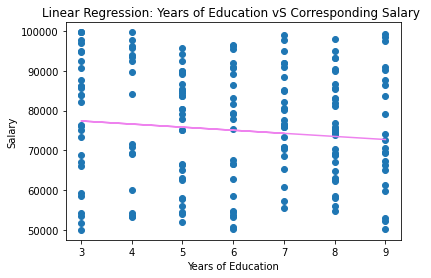

In [762]:
plt.scatter(Testset["Years of Education"], Testset["Salary"])
plt.plot(Testset["Years of Education"],Testset["Predicted Salary Using Sklearn method"], color="violet")
plt.ylabel("Salary")
plt.xlabel("Years of Education")
plt.title("Linear Regression: Years of Education vS Corresponding Salary ")

In [763]:
m=lm.coef_

In [764]:
b=lm.intercept_


In [765]:
#Testing for 7 years of education
Salary = b + m * 7
Salary

array([[74286.35541274]])

In [766]:
lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[74286.35541274]])

In [767]:
assert Salary == lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


THREE PARAMETERS VS SALARY


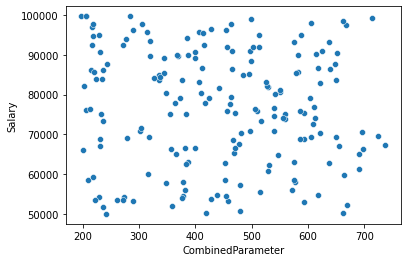

In [768]:
sns.scatterplot(data=Testset, x="CombinedParameter",y="Salary")

In [769]:
# Conducting Linear Regression method and inserting data using the fit method
# Fit function adjusts weights according to data values so that better accuracy can be achieved

lm = linear_model.LinearRegression(). fit(Training[["CombinedParameter"]],Training[["Salary"]])
# Using the predict method
result=lm.predict (Testset[["CombinedParameter"]])

In [770]:
# Creating a new column to place contents of the result variable
Testset["Predicted Salary Using Sklearn method"]= result
Testset["Prediction Error Using Sklearn method"] = Testset["Salary"]-Testset["Predicted Salary Using Sklearn method"]
Testset.head()

,Age,YearsExperience,Years of Education,QYearsExperience,CYearsExperience,CombinedParameter,Salary,Predicted Salary Using Sklearn method,Prediction Error Using Sklearn method
0,54.796262,14.552752,9,211.782583,3082.019357,624.141124,91019.026218,73460.213203,17558.813015
1,52.774087,14.169074,7,200.762647,2844.620717,468.602126,65338.199471,74844.211816,-9506.012344
2,52.497483,14.486505,5,209.858838,3040.121191,334.919942,84974.970717,76033.726727,8941.243991
3,55.012830,15.776872,6,248.909683,3927.016155,424.738210,79080.958366,75234.516495,3846.441871
4,59.144511,16.275620,6,264.895815,4311.343690,452.520789,62774.559215,74987.304851,-12212.745636


Text(0.5, 1.0, 'Linear Regression: Combined Parameters vS Corresponding Salary ')

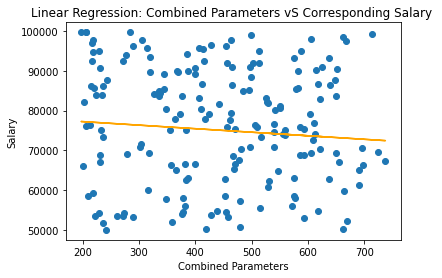

In [771]:
plt.scatter(Testset["CombinedParameter"], Testset["Salary"])
plt.plot(Testset["CombinedParameter"],Testset["Predicted Salary Using Sklearn method"], color="orange")
plt.ylabel("Salary")
plt.xlabel("Combined Parameters")
plt.title("Linear Regression: Combined Parameters vS Corresponding Salary ")

In [772]:
m=lm.coef_

In [773]:
b=lm.intercept_

In [774]:
#Testing for 7 years of education
Salary = b + m * 7
Salary

array([[78951.584948]])

In [775]:
lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[78951.584948]])

In [776]:
assert Salary == lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


QUADRATIC YEARS OF EDUCATION VS SALARY


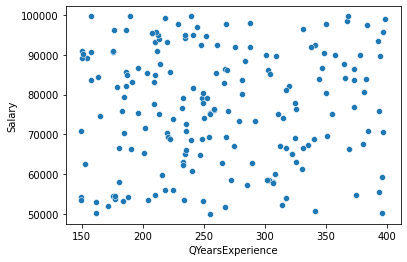

In [777]:
sns.scatterplot(data=Testset, x="QYearsExperience",y="Salary")

In [778]:
# Conducting Linear Regression method and inserting data using the fit method
# Fit function adjusts weights according to data values so that better accuracy can be achieved

lm = linear_model.LinearRegression(). fit(Training[["QYearsExperience"]],Training[["Salary"]])
# Using the predict method
result=lm.predict (Testset[["QYearsExperience"]])

In [779]:
# Creating a new column to place contents of the result variable
Testset["Predicted Salary Using Sklearn method"]= result
Testset["Prediction Error Using Sklearn method"] = Testset["Salary"]-Testset["Predicted Salary Using Sklearn method"]
Testset.head()

,Age,YearsExperience,Years of Education,QYearsExperience,CYearsExperience,CombinedParameter,Salary,Predicted Salary Using Sklearn method,Prediction Error Using Sklearn method
0,54.796262,14.552752,9,211.782583,3082.019357,624.141124,91019.026218,74734.978572,16284.047646
1,52.774087,14.169074,7,200.762647,2844.620717,468.602126,65338.199471,74686.998250,-9348.798778
2,52.497483,14.486505,5,209.858838,3040.121191,334.919942,84974.970717,74726.602671,10248.368047
3,55.012830,15.776872,6,248.909683,3927.016155,424.738210,79080.958366,74896.628343,4184.330022
4,59.144511,16.275620,6,264.895815,4311.343690,452.520789,62774.559215,74966.231262,-12191.672047


Text(0.5, 1.0, 'Linear Regression: Years of experience vS Corresponding Salary ')

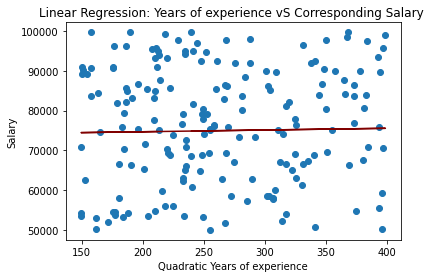

In [780]:
plt.scatter(Testset["QYearsExperience"], Testset["Salary"])
plt.plot(Testset["QYearsExperience"],Testset["Predicted Salary Using Sklearn method"], color="maroon")
plt.ylabel("Salary")
plt.xlabel("Quadratic Years of experience")
plt.title("Linear Regression: Years of experience vS Corresponding Salary ")

In [781]:
m=lm.coef_

In [782]:
b=lm.intercept_

In [783]:
#Testing for 7 years of education
Salary = b + m * 7
Salary

array([[73843.36414974]])

In [784]:
lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[73843.36414974]])

In [785]:
assert Salary == lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


CUBIC YEARS OF EXPERIENCE VS SALARY

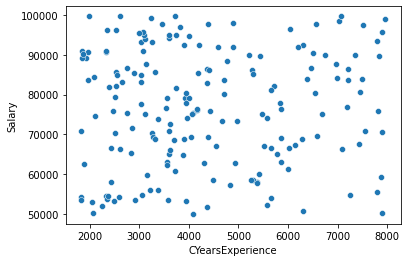

In [786]:
sns.scatterplot(data=Testset, x="CYearsExperience",y="Salary")

In [787]:
# Conducting Linear Regression method and inserting data using the fit method
# Fit function adjusts weights according to data values so that better accuracy can be achieved
#Dataset = pd.read_csv("T.csv")
lm = linear_model.LinearRegression(). fit(Training[["CYearsExperience"]],Training[["Salary"]])
# Using the predict method

result=lm.predict(Testset[["CYearsExperience"]])

In [788]:
# Creating a new column to place contents of the result variable
Testset["Predicted Salary Using Sklearn method"]= result
Testset["Prediction Error Using Sklearn method"] = Testset["Salary"]-Testset["Predicted Salary Using Sklearn method"]
Testset.head()

,Age,YearsExperience,Years of Education,QYearsExperience,CYearsExperience,CombinedParameter,Salary,Predicted Salary Using Sklearn method,Prediction Error Using Sklearn method
0,54.796262,14.552752,9,211.782583,3082.019357,624.141124,91019.026218,74757.512626,16261.513592
1,52.774087,14.169074,7,200.762647,2844.620717,468.602126,65338.199471,74720.579873,-9382.380402
2,52.497483,14.486505,5,209.858838,3040.121191,334.919942,84974.970717,74750.994414,10223.976303
3,55.012830,15.776872,6,248.909683,3927.016155,424.738210,79080.958366,74888.971080,4191.987286
4,59.144511,16.275620,6,264.895815,4311.343690,452.520789,62774.559215,74948.761961,-12174.202746


Text(0.5, 1.0, 'Linear Regression: Years of Education vS Corresponding Salary ')

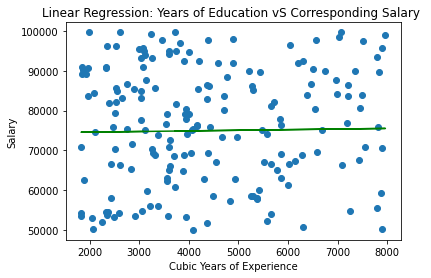

In [789]:
plt.scatter(Testset["CYearsExperience"], Testset["Salary"])
plt.plot(Testset["CYearsExperience"],Testset["Predicted Salary Using Sklearn method"], color="green")
plt.ylabel("Salary")
plt.xlabel("Cubic Years of Experience")
plt.title("Linear Regression: Years of Education vS Corresponding Salary ")

In [790]:
m=lm.coef_

In [791]:
b=lm.intercept_

In [792]:
#Testing for 7 years of education
Salary = b + m * 7
Salary

array([[74279.12348905]])

In [793]:
lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[74279.12348905]])

In [794]:
assert Salary == lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
